Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Building K-Means clustering from scratch

In [26]:
def k_means_clustering(dataset, num_clusters):
    # Remove the "Species" column and store it separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)

    # Convert the dataset to a NumPy array
    data = dataset.values

    # Normalize the data
    data = (data - data.mean(axis=0)) / data.std(axis=0)

    # Randomly initialize centroids
    np.random.seed(0)
    centroids = data[np.random.choice(data.shape[0], size=num_clusters, replace=False)]

    # Initialize an array to store the cluster assignments
    cluster_assignments = np.zeros(data.shape[0])

    # Perform K-Means clustering
    while True:
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        new_cluster_assignments = np.argmin(distances, axis=1)

        # Check for convergence
        if np.array_equal(cluster_assignments, new_cluster_assignments):
            break

        # Update the cluster centroids
        for i in range(num_clusters):
            cluster_points = data[new_cluster_assignments == i]
            centroids[i] = cluster_points.mean(axis=0)

        # Update the cluster assignments
        cluster_assignments = new_cluster_assignments

    # Plot the results
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Get unique species labels and assign colors
    unique_species = species.unique()
    colors = ['r', 'g', 'b'][:len(unique_species)]

    # Plot the clusters
    for i in range(num_clusters):
        cluster_points = data[cluster_assignments == i]
        axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

    axs[0].set_title('K-Means Clustering')
    axs[0].set_xlabel('Sepal Length (cm)')
    axs[0].set_ylabel('Sepal Width (cm)')
    axs[0].legend()

    # Plot the actual species
    for i, species_name in enumerate(unique_species):
        species_points = data[species == species_name]
        axs[1].scatter(species_points[:, 0], species_points[:, 1], c=colors[i], label=species_name)

    axs[1].set_title('Actual Species')
    axs[1].set_xlabel('Sepal Length (cm)')
    axs[1].set_ylabel('Sepal Width (cm)')
    axs[1].legend()

    plt.tight_layout()
    plt.show()




Reading the file and plotting the results

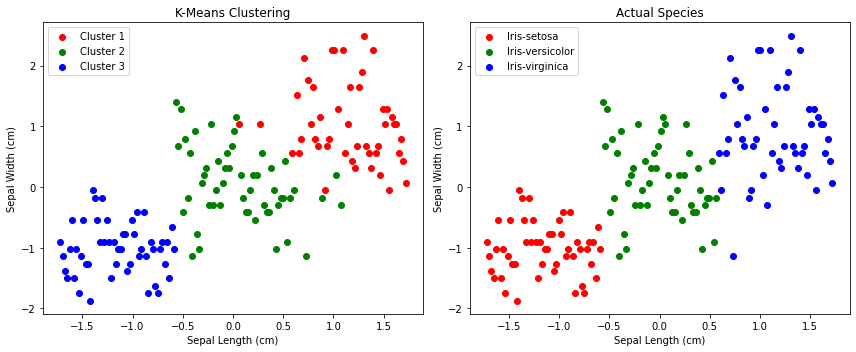

In [27]:
# Load the Iris dataset
dataset = pd.read_csv("C:/Users/Divine/Downloads/Iris Dataset.csv")

# Perform K-Means Clustering with 3 clusters
k_means_clustering(dataset, num_clusters=3)


PCA Analysis

In this code, the PCA analysis is performed by computing the covariance matrix, performing eigenvalue decomposition, and sorting the eigenvalues and eigenvectors. The first three eigenvectors are selected, and the data is transformed to the new feature space. The transformed data is then plotted in a 3D plot using the scatter function. Finally, the eigenvalues are printed for reference.

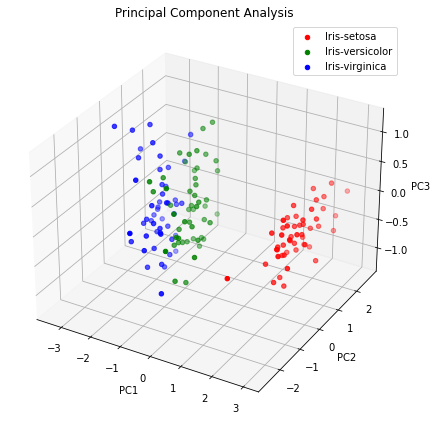

Eigenvalues:
Eigenvalue 1: 3.7603
Eigenvalue 2: 0.9279
Eigenvalue 3: 0.2357
Eigenvalue 4: 0.0888
Eigenvalue 5: 0.0207


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def pca(dataset):
    # Remove the "Species" column and storing it separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)

    # Convert the dataset to a NumPy array
    data = dataset.values

    # Normalize the data
    data = (data - data.mean(axis=0)) / data.std(axis=0)

    # Compute the covariance matrix
    cov_matrix = np.cov(data.T)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Take the first three eigenvectors and compute the transformed data
    transformed_data = np.dot(data, eigenvectors[:, :3])

    # Plot the transformed data
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    species_labels = species.unique()
    species_colors = ['r', 'g', 'b']

    for species_label, species_color in zip(species_labels, species_colors):
        species_indices = species == species_label
        ax.scatter(transformed_data[species_indices, 0],
                   transformed_data[species_indices, 1],
                   transformed_data[species_indices, 2],
                   c=species_color, label=species_label)

    ax.set_title('Principal Component Analysis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()

    plt.tight_layout()
    plt.show()
    print("Eigenvalues:")
    for i, eigenvalue in enumerate(eigenvalues):
        print(f"Eigenvalue {i+1}: {eigenvalue:.4f}")


# Load the Iris dataset
dataset = pd.read_csv("C:/Users/Divine/Downloads/Iris Dataset.csv")

# Perform Principal Component Analysis
pca(dataset)
